In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import koreanize_matplotlib

%matplotlib inline

## Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

- 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
- describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
- 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
- 데이터는 위에서 제공된 데이터를 사용합니다.
- 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [14]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [15]:
df['연도'] = df['시점'].map(lambda x : int(x.split('.')[0]))
df['분기'] = df['시점'].map(lambda x : int(x.split('.')[1].split('/')[0]))
df.rename(columns={'데이터':'백만'}, inplace=True)
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [16]:
df[['백만','연도','분기']].describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


## Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

- 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
- pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [20]:
year_df = pd.pivot_table(data= df, index='국가(대륙)별',columns='연도',values='백만',aggfunc=np.sum)
year_df

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


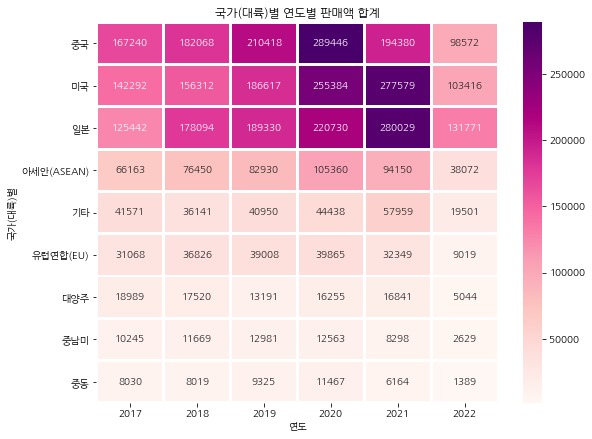

In [58]:
plt.figure(figsize = (9,7))
sns.heatmap(year_df.sort_values(by=2017, ascending=False), annot=True, fmt='.0f', linewidths=1.8, cmap='RdPu')
plt.title('국가(대륙)별 연도별 판매액 합계')
plt.show()

## Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

- 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.


In [109]:
df_total = df[df['연도']==2020].groupby(by=['상품군별','국가(대륙)별'])['백만'].sum().unstack()
df_total

국가(대륙)별,기타,대양주,미국,아세안(ASEAN),유럽연합(EU),일본,중국,중남미,중동
상품군별,,,,,,,,,
가전·전자·통신기기,1716,3825,10103,12405,3040,404,1353,912,839
기 타,3345,923,38731,2620,3907,30509,22736,625,533
농축수산물,9,1,33,17,0,2,88,0,0
사무·문구,187,21,398,3279,25,1526,403,3,4
생활용품 및 자동차용품,1464,1198,11467,6432,2560,3911,7142,1361,1060
서 적,4563,367,9709,4192,514,1055,6659,188,139
소프트웨어,21,20,865,3,99,27,4,15,17
스포츠·레저용품,755,690,5862,7423,1297,646,3999,183,196
아동·유아용품,1646,484,4934,2698,1354,1353,5606,151,121


<AxesSubplot:xlabel='국가(대륙)별'>

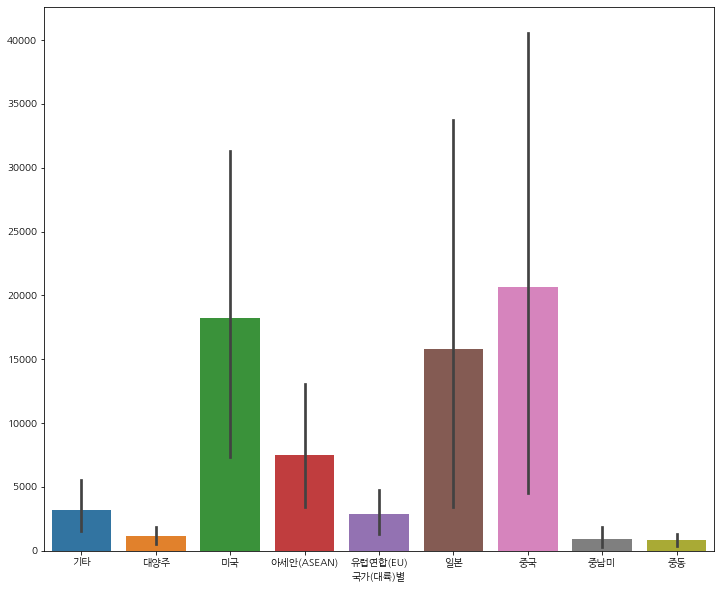

In [136]:
plt.figure(figsize=(12,10))
sns.barplot(data=df_total)

## Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

- 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
- 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.
 

In [124]:
df_sub = df[(df['국가(대륙)별'].isin(['미국','중국','일본'])) & (df['상품군별'].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기"])) & (~df['연도'].isin([2022]))]
df_sub

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
807,일본,화장품,면세점 이외,2020.4/4,11994,2020,4
808,일본,화장품,면세점 이외,2021.1/4,12421,2021,1
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3


([<matplotlib.axis.XTick at 0x231dd5467c0>,
 [Text(2016.5, 0, '2016.5'),
  Text(2017.0, 0, '2017.0'),
  Text(2017.5, 0, '2017.5'),
  Text(2018.0, 0, '2018.0'),
  Text(2018.5, 0, '2018.5')])

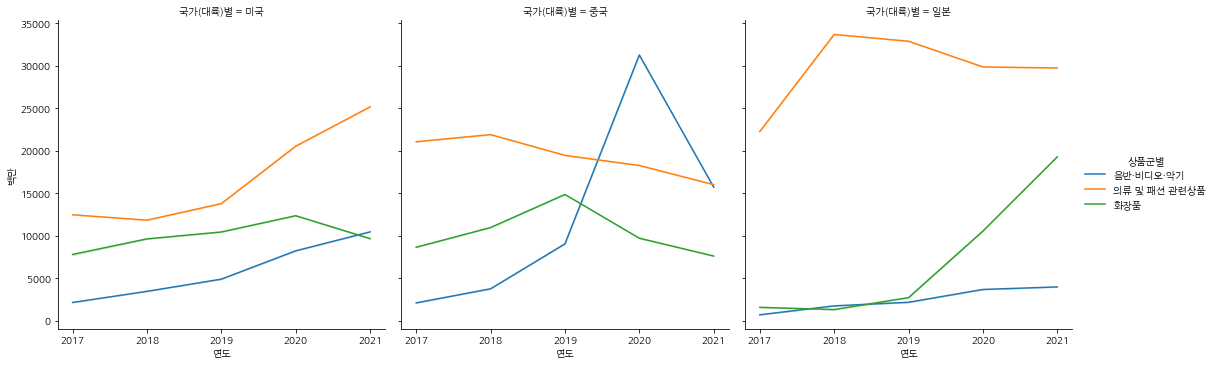

In [135]:
sns.relplot(data=df_sub, x="연도", y="백만", hue="상품군별", col="국가(대륙)별", col_wrap=3, kind="line", ci=False, markers='o')
plt.xticks(range(2017,2022))

In [ ]:
,